<a href="https://colab.research.google.com/github/Adrita-Khan/ccds-internship-workshop/blob/main/eda_vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the shape of the data
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


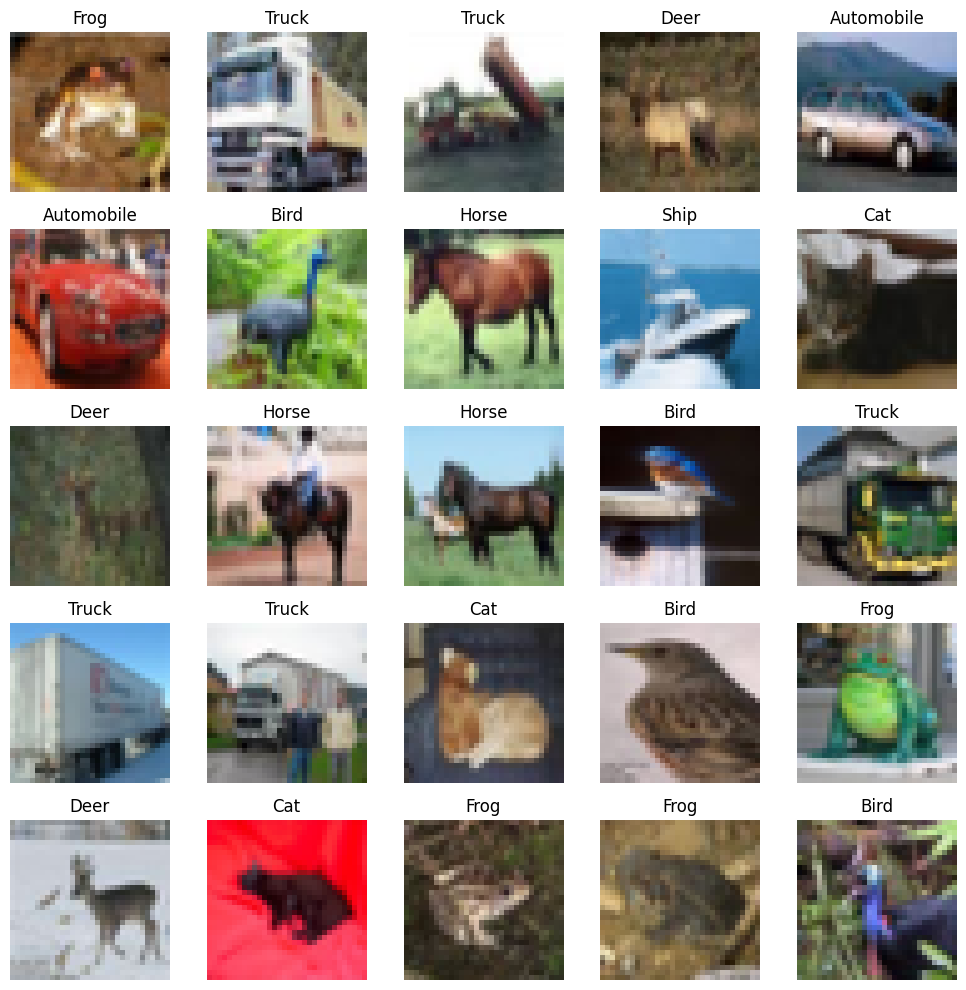

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot a grid of images
def plot_image_grid(images, labels, class_names, grid_size=(5, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    axes = axes.flatten()
    for i in range(grid_size[0] * grid_size[1]):
        img = images[i]
        label = class_names[labels[i][0]]
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display a grid of 25 images from the training set
plot_image_grid(x_train, y_train, class_names, grid_size=(5, 5))


In [ ]:
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


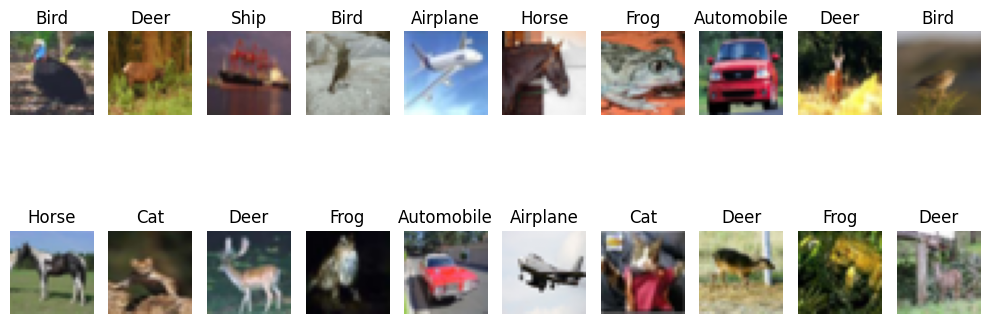

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot a random selection of images
def plot_random_images(images, labels, class_names, num_images=20):
    plt.figure(figsize=(10, 5))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[index])
        plt.title(class_names[labels[index][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_random_images(x_train, y_train, class_names)

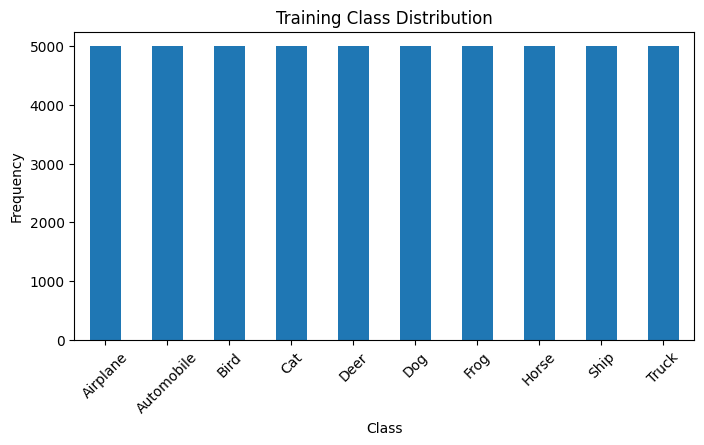

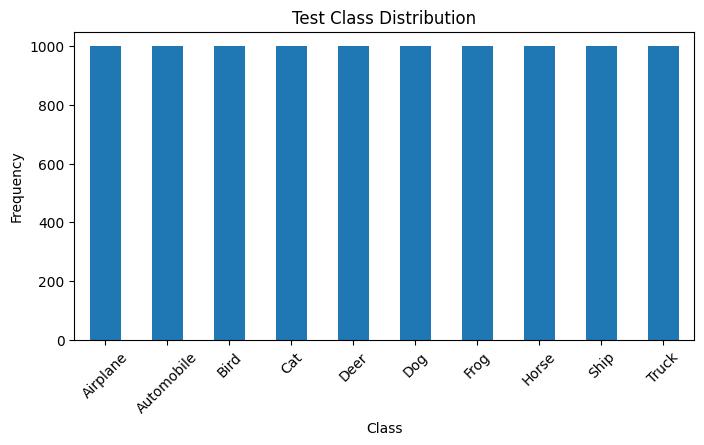

In [ ]:
import pandas as pd

# Count occurrences of each label
train_labels_count = pd.DataFrame(y_train, columns=['Label']).value_counts().sort_index()
test_labels_count = pd.DataFrame(y_test, columns=['Label']).value_counts().sort_index()

# Plot class distribution
train_labels_count.plot(kind='bar', figsize=(8, 4), legend=False, title='Training Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()

test_labels_count.plot(kind='bar', figsize=(8, 4), legend=False, title='Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()


In [ ]:
print(f"Min pixel value in training set: {x_train.min()}")
print(f"Max pixel value in training set: {x_train.max()}")
print(f"Min pixel value in test set: {x_test.min()}")
print(f"Max pixel value in test set: {x_test.max()}")

Min pixel value in training set: 0.0
Max pixel value in training set: 1.0
Min pixel value in test set: 0.0
Max pixel value in test set: 1.0


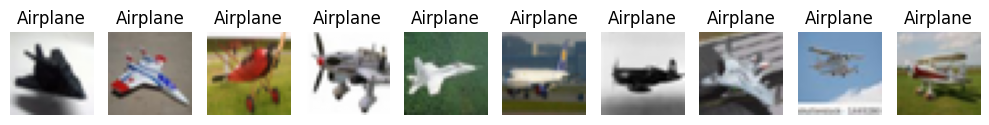

In [ ]:
def plot_class_examples(images, labels, class_name, class_idx, class_names, num_images=10):
    class_indices = np.where(labels == class_idx)[0]
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(class_indices[:num_images]):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx])
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example: Visualize 'Airplane' class
plot_class_examples(x_train, y_train, 'Airplane', 0, class_names)


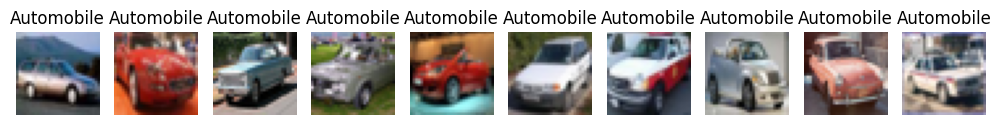

In [ ]:
# Example: Visualize 'Automobile' class
plot_class_examples(x_train, y_train, 'Automobile', 1, class_names)

In [ ]:
mean_per_channel = x_train.mean(axis=(0, 1, 2))
std_per_channel = x_train.std(axis=(0, 1, 2))

print(f"Mean per channel: {mean_per_channel}")
print(f"Standard deviation per channel: {std_per_channel}")

Mean per channel: [0.49139968 0.48215841 0.44653091]
Standard deviation per channel: [0.24703223 0.24348513 0.26158784]


In [ ]:
# Function to check for images with unusual patterns
def find_unusual_images(images, labels):
    unusual_images = []
    for i, img in enumerate(images):
        if img.max() == img.min():
            unusual_images.append(i)
    return unusual_images

unusual_indices = find_unusual_images(x_train, y_train)
print(f"Number of unusual images: {len(unusual_indices)}")

Number of unusual images: 0


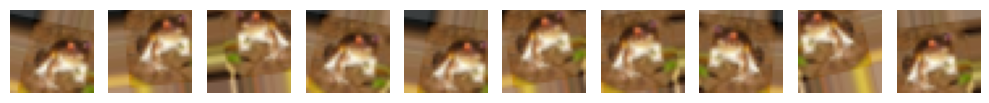

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

# Show augmented images
augmented_images = [datagen.random_transform(x_train[0]) for _ in range(10)]
plt.figure(figsize=(10, 5))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

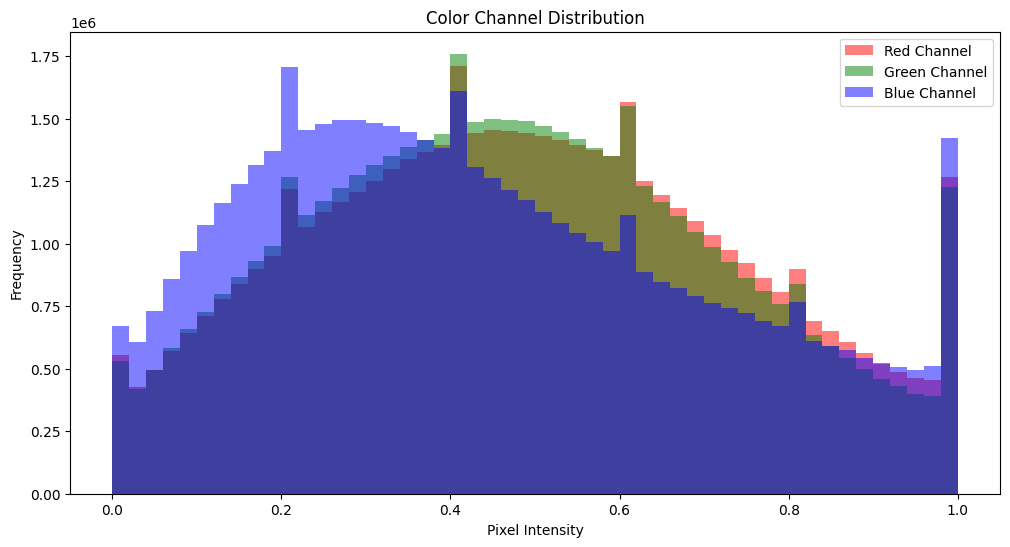

In [ ]:
import matplotlib.pyplot as plt

def plot_color_distribution(images):
    # Flatten the data for each channel
    r_channel = images[:, :, :, 0].flatten()
    g_channel = images[:, :, :, 1].flatten()
    b_channel = images[:, :, :, 2].flatten()

    # Plot histograms
    plt.figure(figsize=(12, 6))
    plt.hist(r_channel, bins=50, color='red', alpha=0.5, label='Red Channel')
    plt.hist(g_channel, bins=50, color='green', alpha=0.5, label='Green Channel')
    plt.hist(b_channel, bins=50, color='blue', alpha=0.5, label='Blue Channel')
    plt.title('Color Channel Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_color_distribution(x_train)

In [ ]:
import pandas as pd

# Compute mean and std for each class
class_stats = {}
for class_idx in range(10):
    class_indices = np.where(y_train == class_idx)[0]
    class_images = x_train[class_indices]
    mean = class_images.mean()
    std = class_images.std()
    class_stats[class_names[class_idx]] = {'Mean': mean, 'Std': std}

# Convert to DataFrame for visualization
class_stats_df = pd.DataFrame(class_stats).T
print(class_stats_df)

                Mean       Std
Airplane    0.558297  0.253877
Automobile  0.457637  0.269827
Bird        0.468257  0.232765
Cat         0.455811  0.257789
Deer        0.438335  0.216177
Dog         0.460370  0.250069
Frog        0.417890  0.228885
Horse       0.466236  0.248900
Ship        0.523435  0.248715
Truck       0.487362  0.272922


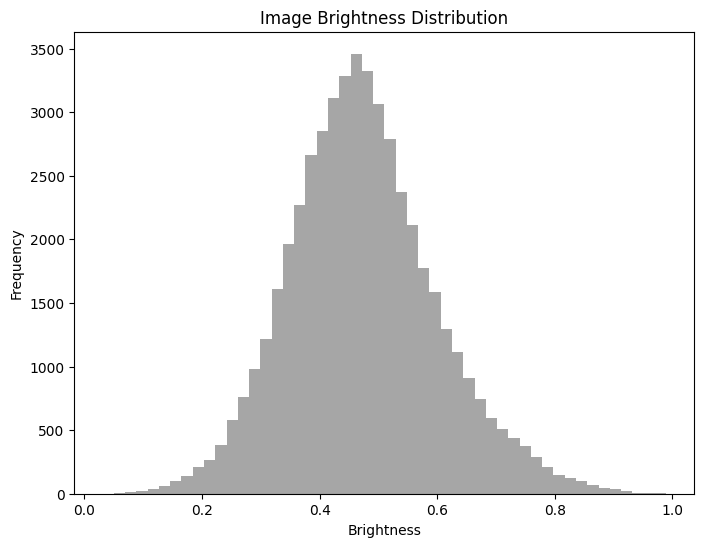

In [ ]:
def compute_brightness(images):
    return np.mean(images, axis=(1, 2, 3))

# Compute brightness for training images
brightness = compute_brightness(x_train)

# Plot brightness histogram
plt.figure(figsize=(8, 6))
plt.hist(brightness, bins=50, color='gray', alpha=0.7)
plt.title('Image Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.show()

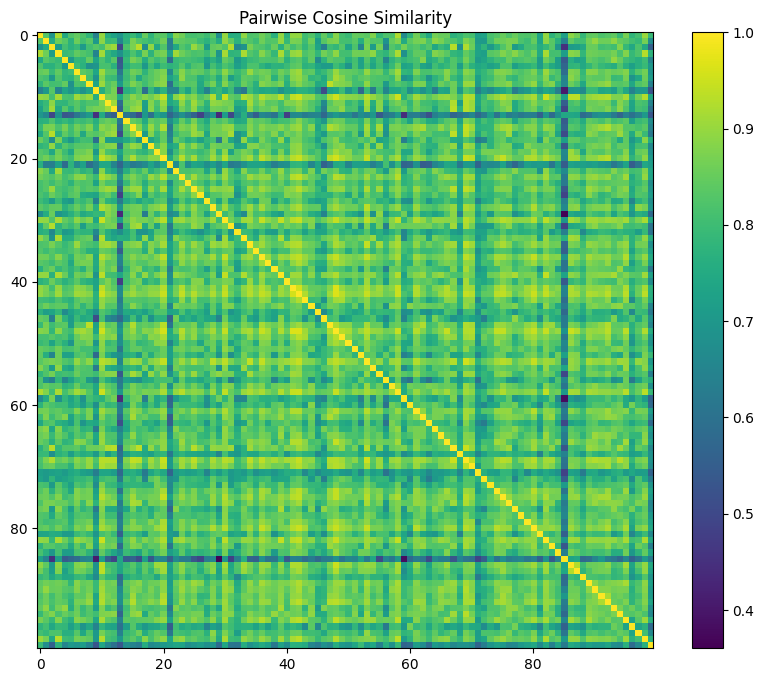

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Flatten images
flat_images = x_train.reshape(x_train.shape[0], -1)

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(flat_images[:100])  # Use a subset for efficiency
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.title('Pairwise Cosine Similarity')
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


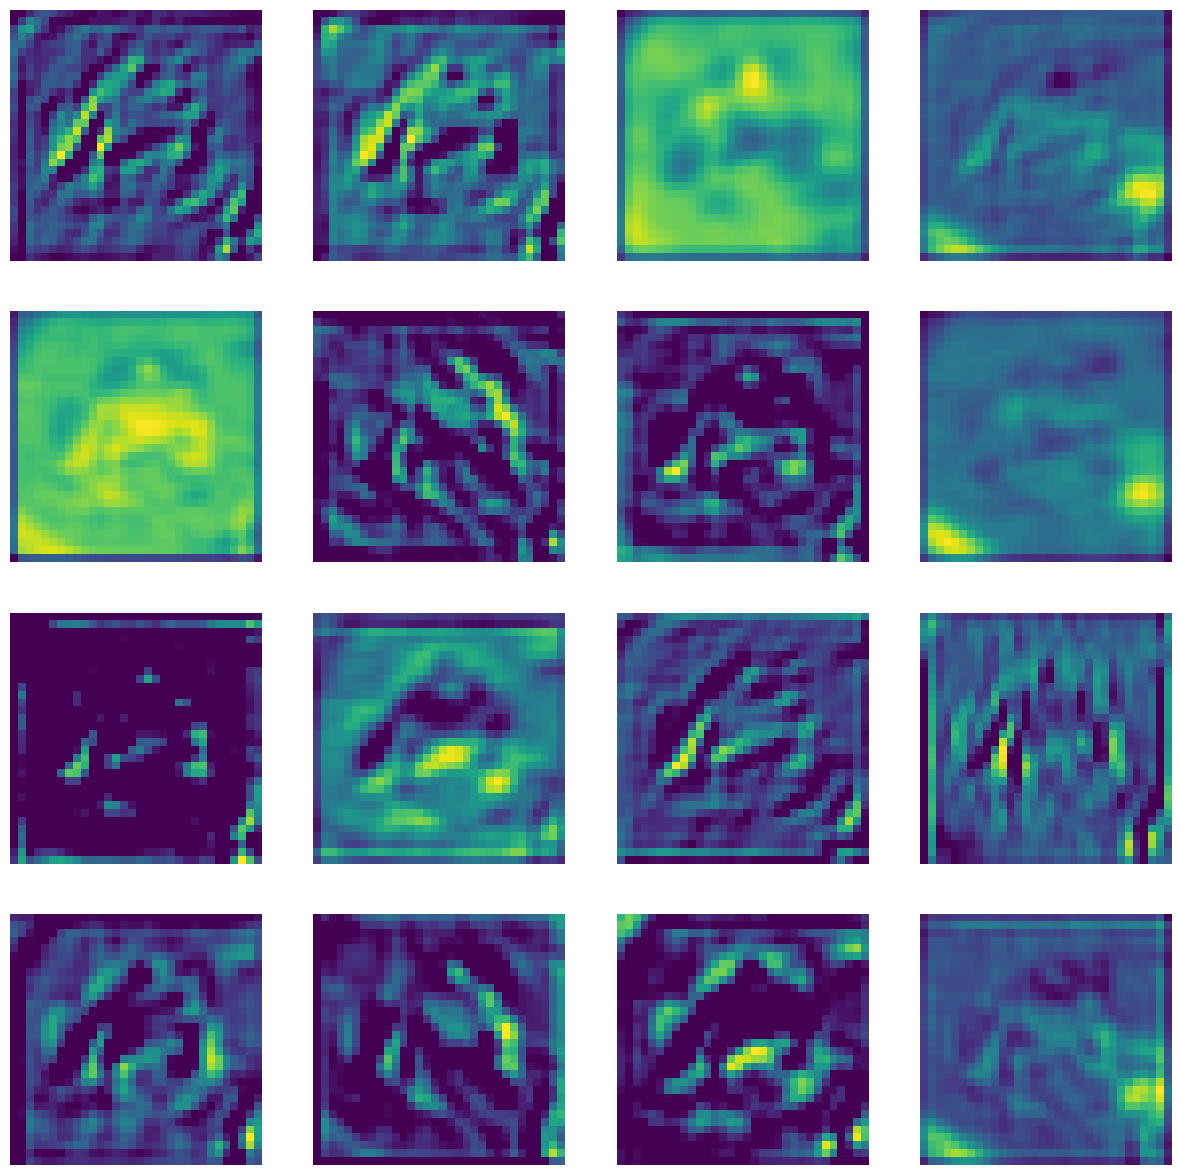

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load a pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a model to extract features
layer_outputs = [layer.output for layer in vgg_model.layers[:8]]
feature_extractor = Model(inputs=vgg_model.input, outputs=layer_outputs)

# Extract features for a single image
features = feature_extractor.predict(np.expand_dims(x_train[0], axis=0))

# Visualize features from a specific convolutional layer
def visualize_features(features, layer_index):
    feature_maps = features[layer_index][0]
    num_features = feature_maps.shape[-1]
    plt.figure(figsize=(15, 15))
    for i in range(min(num_features, 16)):
        plt.subplot(4, 4, i+1)
        plt.imshow(feature_maps[:, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

visualize_features(features, layer_index=2)

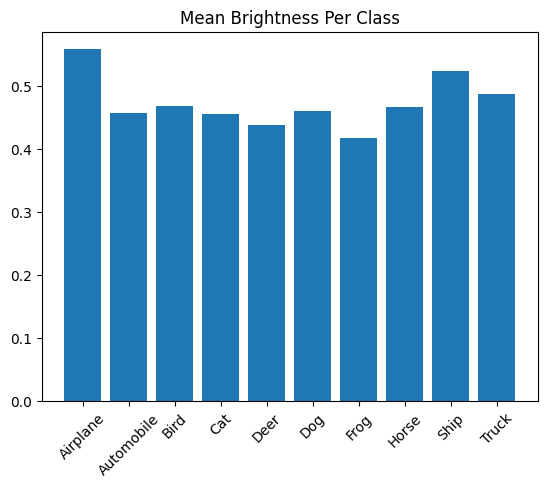

In [ ]:
def compute_class_features(images, labels, feature_func):
    feature_dict = {}
    for class_idx in range(10):
        class_indices = np.where(labels == class_idx)[0]
        class_images = images[class_indices]
        feature_dict[class_names[class_idx]] = feature_func(class_images)
    return feature_dict

# Example: Mean brightness per class
class_brightness = compute_class_features(x_train, y_train, lambda imgs: np.mean(imgs))
plt.bar(class_brightness.keys(), class_brightness.values())
plt.title('Mean Brightness Per Class')
plt.xticks(rotation=45)
plt.show()

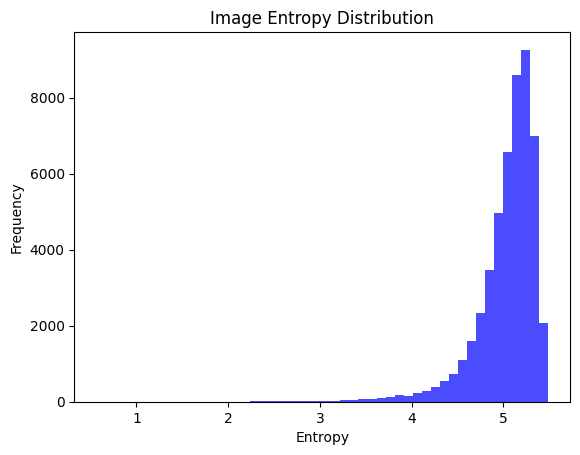

In [ ]:
from scipy.stats import entropy

def compute_image_entropy(image):
    histogram, _ = np.histogram(image, bins=256, range=(0, 1), density=True)
    return entropy(histogram)

image_entropies = [compute_image_entropy(image) for image in x_train]

# Plot entropy distribution
plt.hist(image_entropies, bins=50, color='blue', alpha=0.7)
plt.title('Image Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()
